# BASE MODEL

# Understand the dataset

## target and independent features looking thrugh buiness lense

In [1]:
#read data to pandas dataframe
import pandas as pd

In [2]:
ipl_auction_df = pd.read_csv("IPL IMB381IPL2013.csv")

In [3]:
ipl_auction_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [4]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [5]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

#### Which one is the TARGET ?
### Which are the features

### Which are IDs - Sl no. index, unique no which does not add any information to the data point

In [6]:
X_features = [ 'AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL'] #### What are my features

In [7]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [8]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE']).head()

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [9]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'],drop_first=True).head()

,Batsman,Bowler,W. Keeper
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [10]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE','CAPTAINCY EXP']

In [11]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns = categorical_features, drop_first=True )

In [12]:
ipl_auction_encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0


In [13]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [14]:
X_features = ipl_auction_encoded_df.columns

In [15]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [16]:
Y = ipl_auction_df["SOLD PRICE"] ####What is my Target

In [17]:
import statsmodels.api as sm

In [18]:
X = sm.add_constant(ipl_auction_encoded_df)

# Train and test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size =0.8, random_state=29)

In [21]:
train_X.shape, test_X.shape

((104, 32), (26, 32))

# Build the model on training data

In [22]:
ipl_model_1 = sm.OLS(train_y,train_X).fit()#Ordinary Least Sq Regression

In [23]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.468     
Dependent Variable:        SOLD PRICE              AIC:                       2940.4452 
Date:                      2021-01-24 12:13        BIC:                       3025.0657 
No. Observations:          104                     Log-Likelihood:            -1438.2   
Df Model:                  31                      F-statistic:               3.923     
Df Residuals:              72                      Prob (F-statistic):        9.07e-07  
R-squared:                 0.628                   Scale:                     8.6896e+10
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   387903.4343 218474.6356  1.7755 0.0800  -47617.7920  823424.6605
T-RUNS                     -61.3213     35.1781 -1.7432 0.0856    -131.4475       8.8049
T-WKTS                      64.3101    543.7200  0.1183 0.9062   -1019.5759    1148.1962
ODI-RUNS-S                  69.3701     35.0927  1.9768 0.0519      -0.5860     139.3262
ODI-SR-B                  -103.0542   1454.7682 -0.0708 0.9437   -3003.0817    2796.9732
ODI-WKTS                   739.1059    720.8782  1.0253 0.3087    -697.9386    2176.1504
ODI-SR-BL                -1527.1766   1416.2928 -1.0783 0.2845   -4350.5047    1296.1515
RUNS-S                     189.4022    148.6778  1.2739 0.2068    -106.9816     485.7861
HS                       -6308.9389   2454.4226 -2.5704 0.0122  -11201.7409   -1416.1369
AVE                      20793.7034   7257.4914  2.8651 0.0055    6326.1588   35261.2480
SR-B                     -1680.6040   1219.2251 -1.3784 0.1723   -4111.0849     749.8769
SIXERS                    1022.6925   3073.9774  0.3327 0.7403   -5105.1695    7150.5544
RUNS-C                      48.7904    288.3439  0.1692 0.8661    -526.0126     623.5935
WKTS                      4729.5534   7585.4172  0.6235 0.5349  -10391.6994   19850.8061
AVE-BL                    7681.5087  10573.7373  0.7265 0.4699  -13396.8515   28759.8688
ECON                     -2697.7860  11646.7632 -0.2316 0.8175  -25915.1841   20519.6121
SR-BL                    -8830.2580  15558.3211 -0.5676 0.5721  -39845.2043   22184.6883
AGE_2                  -266836.3568 101432.4696 -2.6307 0.0104 -469038.2893  -64634.4243
AGE_3                  -329667.1501 144907.6057 -2.2750 0.0259 -618535.1826  -40799.1176
COUNTRY_BAN             -79178.3279 389360.6050 -0.2034 0.8394 -855354.5080  696997.8522
COUNTRY_ENG             716899.7043 220623.4500  3.2494 0.0018  277094.8948 1156704.5138
COUNTRY_IND             161715.0411 117544.0916  1.3758 0.1732  -72604.8230  396034.9052
COUNTRY_NZ              363816.9913 180800.4603  2.0123 0.0479    3397.8609  724236.1216
COUNTRY_PAK              96555.6492 152017.9279  0.6352 0.5273 -206486.5514  399597.8498
COUNTRY_SA               66323.1478 134250.5266  0.4940 0.6228 -201300.3857  333946.6813
COUNTRY_SL               29510.5933 144342.1055  0.2044 0.8386 -258230.1351  317251.3218
COUNTRY_WI               -6505.8994 177299.5926 -0.0367 0.9708 -359946.1775  346934.3786
COUNTRY_ZIM            -210772.9821 354313.9725 -0.5949 0.5538 -917084.9772  495539.0131
PLAYING ROLE_Batsman    161003.7244 133782.0077  1.2035 0.2327 -105685.8337  427693.2825
PLAYING ROLE_Bowler     -59750.3772 110154.0138 -0.5424 0.5892 -279338.3903  159837.6360
PLAYING ROLE_W. Keeper  114937.9425 190490.8674  0.6034 0.5482 -264798.6614  494674.5463
CAPTAINCY EXP_1         103103.4890 120075.3383  0.8587 0.3934 -136262.3231  342469.3012
----------------------------------------------------------------

# Goodness of a model

In [24]:
#RMSE
#MSE
#MAE
#MAPE

In [25]:
pred_y = ipl_model_1.predict(test_X)#predicting y for X in test data..also i had actual y in test data..now we will look at diff or error

In [26]:
from sklearn import metrics

In [27]:
import numpy as np

In [28]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

427078.26028047694

In [29]:
round(metrics.r2_score(pred_y,test_y), 2)

-1.73

In [30]:
test_X.iloc[:1,:].to_csv("New_data_for_IPL.csv", index = False)

In [31]:
new_data = pd.read_csv("New_data_for_IPL.csv")

In [32]:
new_data

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,1.0,275,101,327,73.81,185,31.1,64,17,5.82,...,0,0,0,1,0,0,0,1,0,0


In [33]:
pred_y_new = ipl_model_1.predict(new_data)

In [34]:
pred_y_new

0    478743.898523
dtype: float64

In [35]:
new_data["Predicted_SoldPrice"] = pred_y_new

In [38]:
pred_y_new.to_csv("Predicted Results of New Data.csv")

# Feature Selection Using VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [41]:
vif_factors = get_vif_factors( ipl_auction_encoded_df[X_features] )
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [42]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

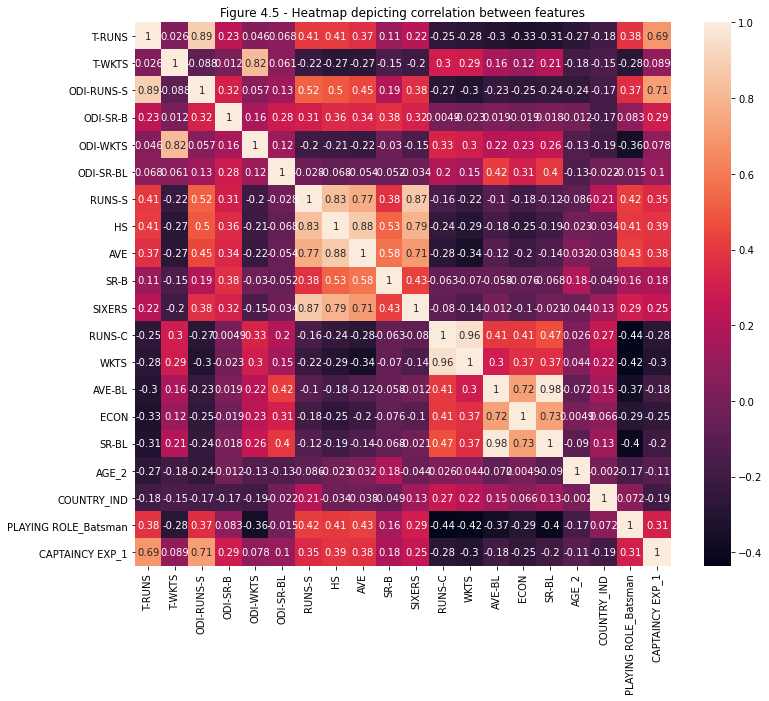

In [46]:
plt.figure( figsize = (12,10) )
sn.heatmap( ipl_auction_encoded_df[columns_with_large_vif].corr(), annot = True );
plt.title( "Figure 4.5 - Heatmap depicting correlation between features");

In [47]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [48]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [49]:
get_vif_factors( ipl_auction_encoded_df[X_new_features] )

,column,vif
0,COUNTRY_PAK,1.334773
1,COUNTRY_NZ,1.173418
2,AGE_3,1.779861
3,ODI-SR-BL,2.822148
4,ODI-WKTS,2.742889
5,WKTS,2.883101
6,PLAYING ROLE_Bowler,3.060168
7,COUNTRY_WI,1.194093
8,PLAYING ROLE_Batsman,2.680207
9,SIXERS,2.397409


In [52]:
Y = ipl_auction_df["SOLD PRICE"] ####What is my Target

In [57]:
X = sm.add_constant(ipl_auction_encoded_df[X_new_features])

In [58]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size =0.8, random_state=29)
ipl_model_2 = sm.OLS(train_y,train_X).fit()#Ordinary Least Sq Regression
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.380     
Dependent Variable:        SOLD PRICE              AIC:                       2947.6104 
Date:                      2021-01-24 12:19        BIC:                       2997.8538 
No. Observations:          104                     Log-Likelihood:            -1454.8   
Df Model:                  18                      F-statistic:               4.509     
Df Residuals:              85                      Prob (F-statistic):        9.89e-07  
R-squared:                 0.488                   Scale:                     1.0125e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   129033.7682 120294.6376  1.0726 0.2865 -110144.1993  368211.7356
COUNTRY_PAK              52655.2579 146115.1579  0.3604 0.7195 -237860.8212  343171.3371
COUNTRY_NZ              158554.7962 176446.7445  0.8986 0.3714 -192268.6033  509378.1956
AGE_3                  -101851.8681 101986.0759 -0.9987 0.3208 -304627.5098  100923.7736
ODI-SR-BL                 -546.0925   1279.2797 -0.4269 0.6705   -3089.6433    1997.4583
ODI-WKTS                   780.3595    409.2734  1.9067 0.0599     -33.3857    1594.1047
WKTS                      2807.5586   2063.8360  1.3604 0.1773   -1295.9003    6911.0175
PLAYING ROLE_Bowler     -98083.6177 102930.7312 -0.9529 0.3433 -302737.4872  106570.2518
COUNTRY_WI             -140830.1533 168573.1230 -0.8354 0.4058 -475998.6838  194338.3773
PLAYING ROLE_Batsman    106495.6235 107202.7661  0.9934 0.3233 -106652.1959  319643.4429
SIXERS                    5758.7658   1716.2361  3.3555 0.0012    2346.4287    9171.1030
COUNTRY_SA               46316.9847 130245.3120  0.3556 0.7230 -212645.5893  305279.5587
COUNTRY_SL               30330.0810 141420.6674  0.2145 0.8307 -250852.0935  311512.2554
COUNTRY_ZIM            -137955.5610 360014.9460 -0.3832 0.7025 -853761.7242  577850.6022
CAPTAINCY EXP_1         219706.3810  93280.0758  2.3553 0.0208   34240.6000  405172.1621
COUNTRY_ENG             644892.2171 212836.7427  3.0300 0.0032  221715.7521 1068068.6821
COUNTRY_BAN            -104783.5785 347521.4293 -0.3015 0.7638 -795749.2834  586182.1264
COUNTRY_IND             311599.1292 103868.7716  2.9999 0.0035  105080.1842  518118.0743
PLAYING ROLE_W. Keeper  -64409.4224 152557.7003 -0.4222 0.6739 -367735.0018  238916.1571
----------------------------------------------------------------------------------------
Omnibus:                     14.703               Durbin-Watson:                  2.084 
Prob(Omnibus):               0.001                Jarque-Bera (JB):               17.263
Skew:                        0.793                Prob(JB):                       0.000 
Kurtosis:                    4.213                Condition No.:                  1695  
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [ ]:
#RMSE
#MSE
#MAE
#MAPE